> Proszę zaimplementować funkcję odwracającą listę jednokierunkową.

##### Implementacja funkcji testującej prawidłowość algorytmu (nie jest częścią zadania)

In [1]:
import random

def test_reverse(ll_class, reverse_fn, *, reps=20):
    passed = 0
    for i in range(reps):
        values = [random.randint(-100, 100) for _ in range(random.randint(1, 20))]
        ll = ll_class(values)
        expected = values[::-1]  # The same as reversed(values)
        print(f'#{i+1} loop (already passed {passed}/{reps}):')
        print('Before reversing:', ll)
        reverse(ll)
        is_correct = list(ll) == expected
        passed += is_correct
        print('After reversing:', ll)
        print('Expected result:', ' -> '.join(str(v) for v in expected))
        print(f'Test {"passed" if is_correct else "failed"}')
        print()
    print(f'Total tests passed {passed}/{reps}')
    print(f'An algorithm is {"correct" if passed == reps else "wrong"}')

### I sposób - przepinanie wskaźników (bardziej prawidłowy)

Rozwiązanie to polega na zmianie kierunku wskazywania odsyłaczy (wskażników). Tzn. każdy ze wskażników, który wskazuje od strony pierwszego węzła ($ self.head $) do ostatniego ($ self.tail $) na kolejny element listy, zostaje odwrócony i zaczyna wskazywać w przeciwnym kierunku - od końca ($ self.tail $) do początku ($ self.head $).

###### Poniżej wyjaśnienie
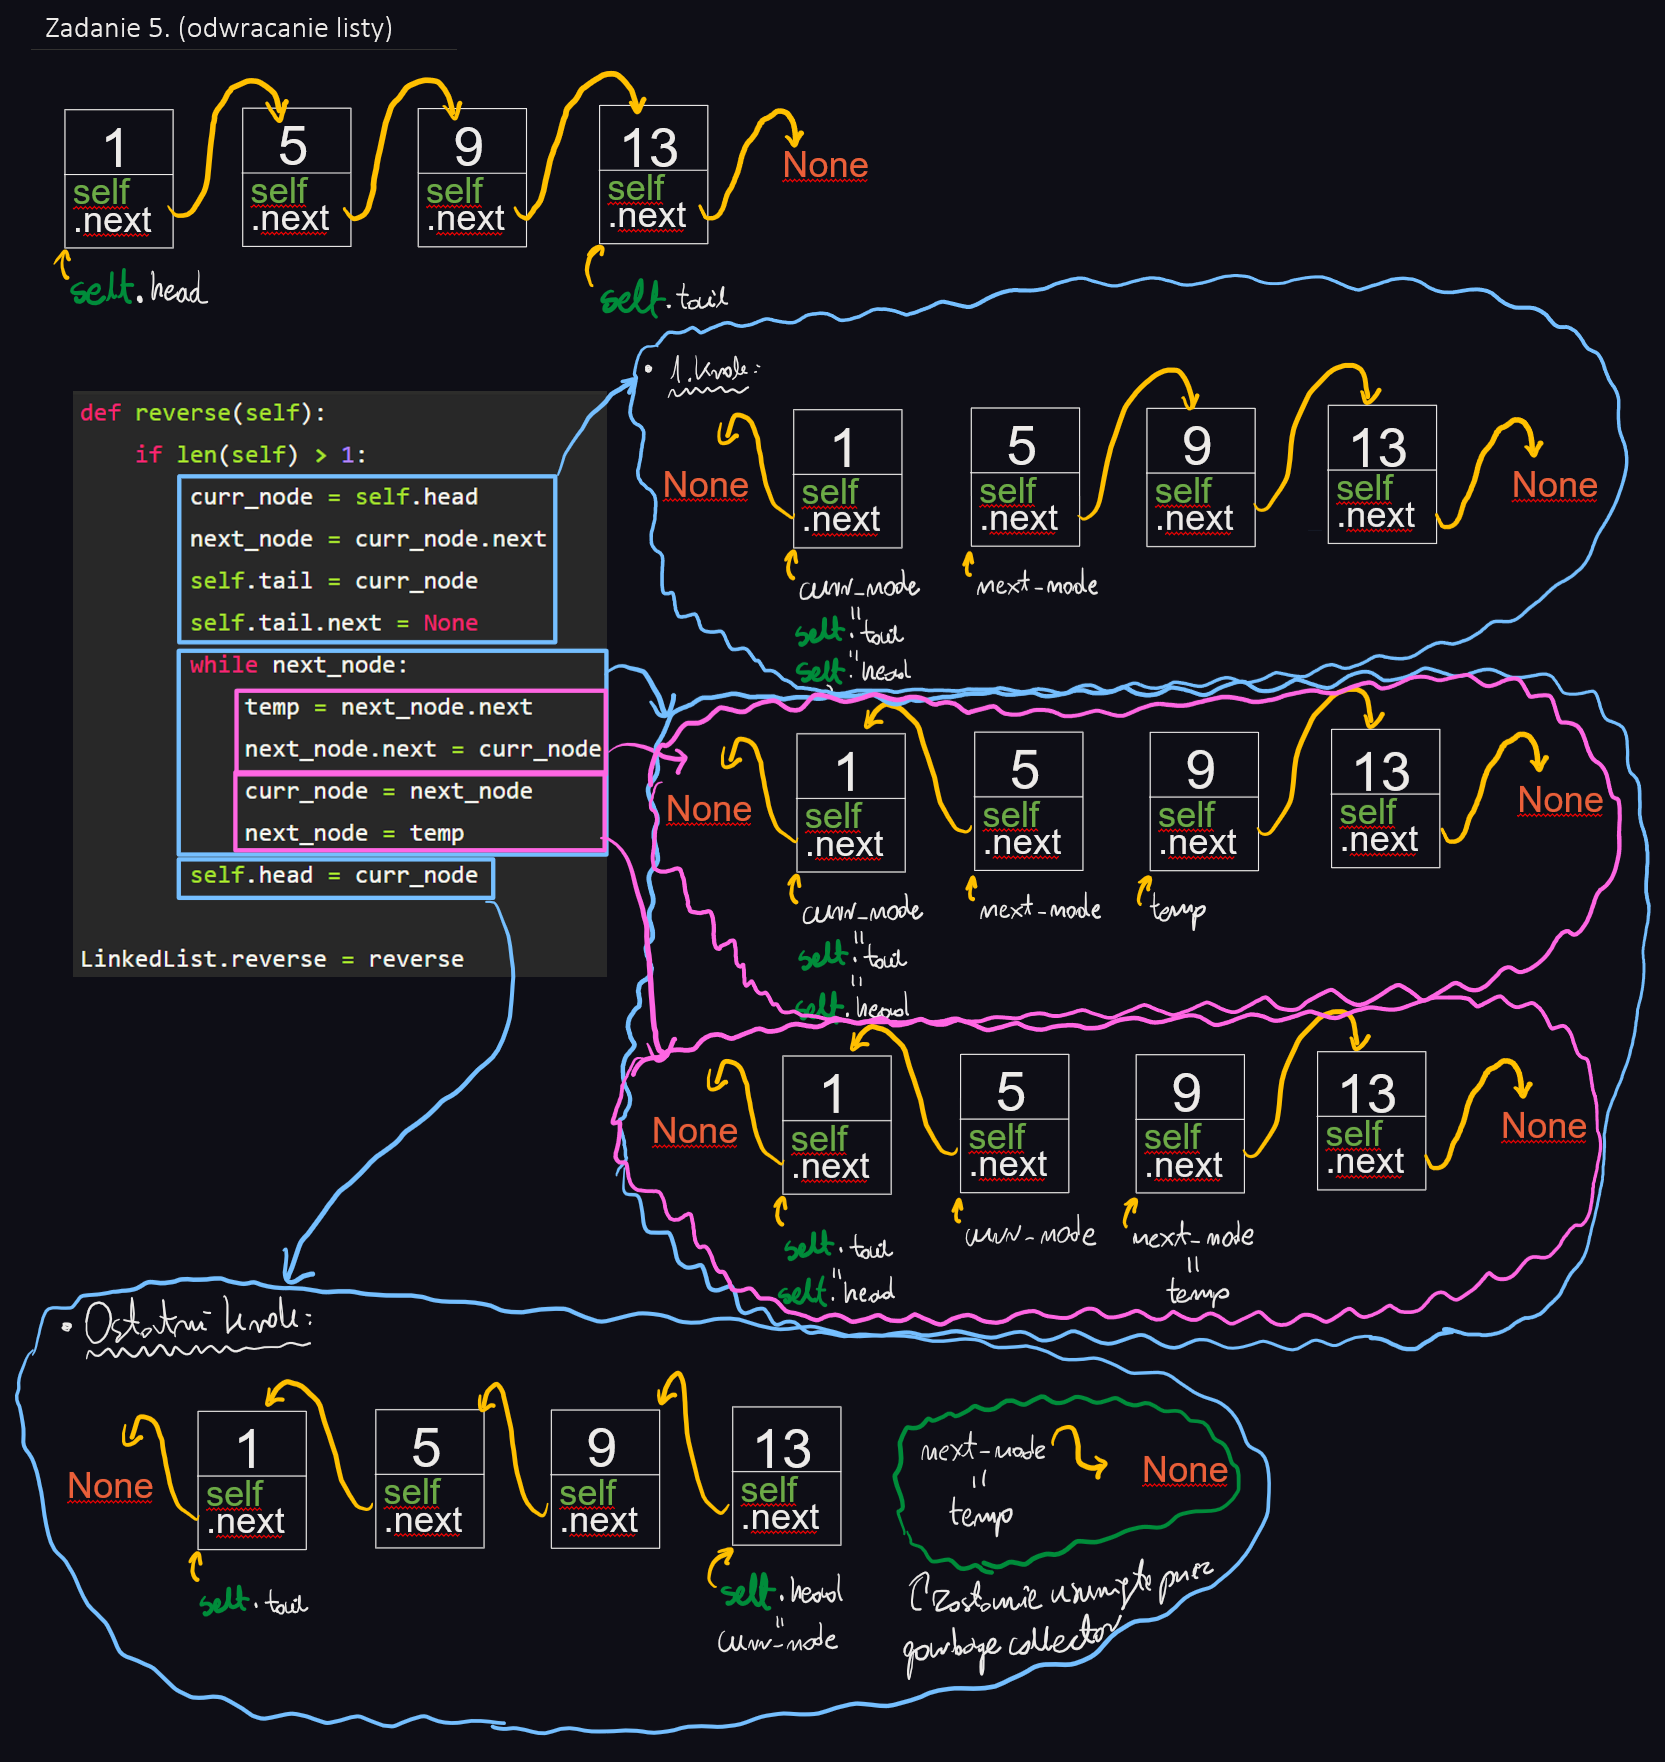

#### Uproszczona imlementacja struktury na potrzeby tego zadania

In [2]:
class Node:
    def __init__(self, val):
        self.val = val
        self.next = None


class LinkedList:
    def __init__(self, iterable=None):
        self.head = self.tail = None
        self._length = 0
        iterable and self.extend(iterable)
        
    def __len__(self):
        return self._length
        
    def __iter__(self):
        curr = self.head
        while curr:
            yield curr.val
            curr = curr.next
        
    def __str__(self):
        return ' -> '.join(map(lambda v: str(v), self))
    
    def append(self, val): 
        node = Node(val)
        if not self: self.head = self.tail = node
        else:
            self.tail.next = node
            self.tail = node
        self._length += 1

    def extend(self, values):
        for val in values:
            self.append(val)

#### Implementacja funkcji, odwracającej listę jednokierunkową

In [3]:
def reverse(ll):
    # Modify a Linked List only if its length is greater than 1 as empty or single-element
    # Linked List will remain unchanged after having been reversed
    if len(ll) > 1:
        curr_node = ll.head
        next_node = curr_node.next
        ll.tail = curr_node
        ll.tail.next = None
        while next_node:
            temp = next_node.next
            next_node.next = curr_node
            curr_node = next_node
            next_node = temp
        ll.head = curr_node

###### Przykładowy test

In [4]:
test_reverse(LinkedList, reverse, reps=100)

#1 loop (already passed 0/100):
Before reversing: -49 -> 61
After reversing: 61 -> -49
Expected result: 61 -> -49
Test passed

#2 loop (already passed 1/100):
Before reversing: -90 -> -34 -> -92 -> -12 -> 24 -> -91 -> -13 -> 5 -> -4 -> 3 -> -9 -> 12 -> 36 -> 66 -> 18 -> 30 -> 37
After reversing: 37 -> 30 -> 18 -> 66 -> 36 -> 12 -> -9 -> 3 -> -4 -> 5 -> -13 -> -91 -> 24 -> -12 -> -92 -> -34 -> -90
Expected result: 37 -> 30 -> 18 -> 66 -> 36 -> 12 -> -9 -> 3 -> -4 -> 5 -> -13 -> -91 -> 24 -> -12 -> -92 -> -34 -> -90
Test passed

#3 loop (already passed 2/100):
Before reversing: -23 -> -41
After reversing: -41 -> -23
Expected result: -41 -> -23
Test passed

#4 loop (already passed 3/100):
Before reversing: -81 -> 19 -> 3 -> 77 -> 89
After reversing: 89 -> 77 -> 3 -> 19 -> -81
Expected result: 89 -> 77 -> 3 -> 19 -> -81
Test passed

#5 loop (already passed 4/100):
Before reversing: 19 -> -53 -> -35 -> 4 -> -71 -> 45 -> 29
After reversing: 29 -> 45 -> -71 -> 4 -> -35 -> -53 -> 19
Expected r

### II sposób - tworzenie nowej listy jednokierunkowej (mniej poprawny)

#### Uproszczona imlementacja struktury na potrzeby tego zadania

Jeszcze raz wklejam implementację struktury, ponieważ dodałem jedną metodę i myślę, że czytelniejsze jest jej zadeklarowanie wewnątrz klasy niż poza nią

In [5]:
class Node:
    def __init__(self, val):
        self.val = val
        self.next = None


class LinkedList:
    def __init__(self, iterable=None):
        self.head = self.tail = None
        self._length = 0
        iterable and self.extend(iterable)
        
    def __len__(self):
        return self._length
        
    def __iter__(self):
        curr = self.head
        while curr:
            yield curr.val
            curr = curr.next
        
    def __str__(self):
        return ' -> '.join(map(lambda v: str(v), self))
    
    def append(self, val): 
        node = Node(val)
        if not self: self.head = self.tail = node
        else:
            self.tail.next = node
            self.tail = node
        self._length += 1
        
    def appendleft(self, val):  # This method was added
        node = Node(val)
        if not self: self.head = self.tail = node
        else:
            node.next = self.head
            self.head = node
        self._length += 1

    def extend(self, values):
        for val in values:
            self.append(val)

#### Implementacja funkcji, odwracającej listę jednokierunkową

In [6]:
def reverse(ll):
    # Create a new Linked List in a reversed order
    reversed_ll = LinkedList()
    for val in ll:
        reversed_ll.appendleft(val)
    # Update a head and a tail node of the initial Linked List
    ll.head = reversed_ll.head
    ll.tail = reversed_ll.tail

###### Przykładowy test

In [7]:
test_reverse(LinkedList, reverse, reps=100)

#1 loop (already passed 0/100):
Before reversing: 57 -> -42 -> 14 -> -9
After reversing: -9 -> 14 -> -42 -> 57
Expected result: -9 -> 14 -> -42 -> 57
Test passed

#2 loop (already passed 1/100):
Before reversing: 23 -> 62 -> -34 -> 4 -> 54 -> -56 -> 59 -> -85 -> 12 -> 95 -> 20 -> 41 -> 31
After reversing: 31 -> 41 -> 20 -> 95 -> 12 -> -85 -> 59 -> -56 -> 54 -> 4 -> -34 -> 62 -> 23
Expected result: 31 -> 41 -> 20 -> 95 -> 12 -> -85 -> 59 -> -56 -> 54 -> 4 -> -34 -> 62 -> 23
Test passed

#3 loop (already passed 2/100):
Before reversing: 32 -> -65 -> 84 -> -32 -> 35 -> 45 -> 62
After reversing: 62 -> 45 -> 35 -> -32 -> 84 -> -65 -> 32
Expected result: 62 -> 45 -> 35 -> -32 -> 84 -> -65 -> 32
Test passed

#4 loop (already passed 3/100):
Before reversing: -79 -> -85 -> 49 -> -33 -> -47 -> -83 -> -31 -> 56 -> 52 -> -43 -> 98
After reversing: 98 -> -43 -> 52 -> 56 -> -31 -> -83 -> -47 -> -33 -> 49 -> -85 -> -79
Expected result: 98 -> -43 -> 52 -> 56 -> -31 -> -83 -> -47 -> -33 -> 49 -> -85 ->